# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Оглавление<a name="Оглавление"></a>

- 1. [Загрузка и подготовка данных](#Загрузка)
  - 1.1. [Первый регион](#Первый)
  - 1.2. [Второй регион](#Второй)
  - 1.3. [Третий регион](#Третий)
  - 1.4. [Вывод по подготовке](#Вывод_подготовке)
- 2. [Обучение и проверка модели](#Обучение)
  - 2.1. [Первый регион](#Первый_регион)
    - 2.1.1. [Вывод по первому региону](#первому)
  - 2.2. [Второй регион](#Второй_регион)
    - 2.2.1. [Вывод по первому региону](#второму)
  - 2.3. [Третий регион](#Третий_регион)
    - 2.3.1. [Вывод по первому региону](#третьему)
  - 2.4. [Общий вывод по обучению и проверке моделей](#Общий_вывод)
- 3. [Подготовка к расчёту прибыли](#Подготовка)
  - 3.1. [Вывод по убыточности](#Вывод_убыточности)
- 4. [Расчёт прибыли и рисков](#Расчёт)
  - 4.1. [Расчёт прибыли](#прибыли)
    - 4.1.1 [Первый регион](#первый)
    - 4.1.2 [Второй регион](#второй)
    - 4.1.3 [Третий регион](#третий)
    - 4.1.4. [Вывод по прибыли](#Вывод_прибыли)
  - 4.2. [Расчёт рисков](#рисков)
- 5. [Итоговый вывод](#Итоговый_вывод)

## 1. Загрузка и подготовка данных<a name="Загрузка"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    first_region = pd.read_csv('/datasets/geo_data_0.csv')
except:
    first_region = pd.read_csv('./datasets/geo_data_0.csv')

In [3]:
try:
    second_region = pd.read_csv('/datasets/geo_data_1.csv')
except:
    second_region = pd.read_csv('./datasets/geo_data_1.csv')

In [4]:
try:
    third_region = pd.read_csv('/datasets/geo_data_2.csv')
except:
    third_region = pd.read_csv('./datasets/geo_data_2.csv')

### 1.1. Первый регион<a name="Первый"></a>

In [5]:
first_region.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
first_region.info()
first_region.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


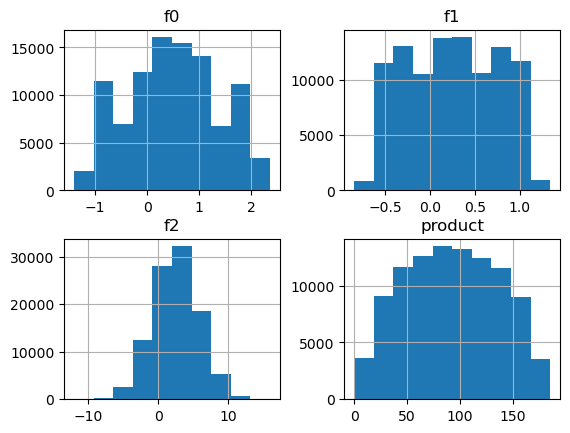

In [7]:
first_region.hist();

In [8]:
first_region.duplicated().sum()

0

[К оглавлению](#Оглавление)

### 1.2. Второй регион<a name="Второй"></a>

In [9]:
second_region.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
second_region.info()
second_region.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


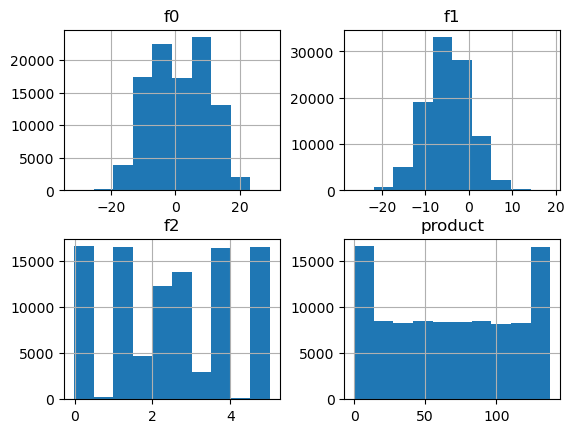

In [11]:
second_region.hist();

In [12]:
second_region.duplicated().sum()

0

[К оглавлению](#Оглавление)

### 1.3. Третий регион<a name="Третий"></a>

In [13]:
third_region.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
third_region.info()
third_region.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


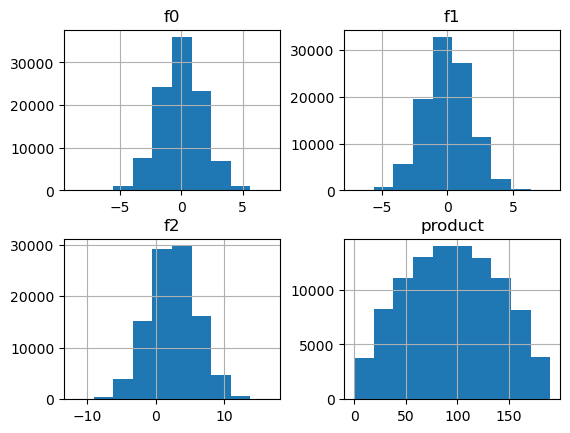

In [15]:
third_region.hist();

In [16]:
third_region.duplicated().sum()

0

### 1.4. Вывод по подготовке<a name="Вывод_подготовке"></a>

Пропусков в данных не обнаружено

Размер трёх выборок одинаковый

Дубликатов в данных не обнаружено

Все признаки являются численными

[К оглавлению](#Оглавление)

## 2. Обучение и проверка модели<a name="Обучение"></a>

### 2.1. Первый регион <a name="Первый_регион"></a>

Поделим данные на тренировочную и валидационную 75:25

In [17]:
df_train_0, df_valid_0 = train_test_split(first_region, test_size=0.25, random_state=12345)

In [18]:
df_train_0.shape

(75000, 5)

In [19]:
df_valid_0.shape

(25000, 5)

Запишем в обучающие признаки данные из обучающей выборки, исключив ненужные столбцы

In [20]:
features_train_0 = df_train_0.drop(['id', 'product'], axis=1)
target_train_0 = df_train_0['product']
features_valid_0 = df_valid_0.drop(['id', 'product'], axis=1)
target_valid_0 = df_valid_0['product']

Обучение модели логистической регрессии 

In [21]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_valid_0 = model_0.predict(features_valid_0)

In [22]:
rmse_0 = mean_squared_error(target_valid_0, predictions_valid_0) ** .5
print('RMSE:', rmse_0)

RMSE: 37.5794217150813


In [23]:
product_pred_mean_0 = predictions_valid_0.mean()
print('Средний запас предсказанного сырья:', product_pred_mean_0)

Средний запас предсказанного сырья: 92.59256778438035


#### 2.1.1. Вывод по первому региону<a name="Вывод_первому"></a>

Cредний запас предсказанного сырья = 92.59

RMSE (отклонение) = 37.6

[К оглавлению](#Оглавление)

### 2.2. Второй регион<a name="Второй_регион"></a>

Поделим данные на тренировочную и валидационную 75:25

In [24]:
df_train_1, df_valid_1 = train_test_split(second_region, test_size=.25, random_state=12345)

In [25]:
df_train_1.shape

(75000, 5)

In [26]:
df_valid_1.shape

(25000, 5)

Запишем в обучающие признаки данные из обучающей выборки, исключив ненужные столбцы

In [27]:
features_train_1 = df_train_1.drop(['id', 'product'], axis=1)
target_train_1 = df_train_1['product']
features_valid_1 = df_valid_1.drop(['id', 'product'], axis=1)
target_valid_1 = df_valid_1['product']

Обучение модели логистической регрессии 

In [28]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)

In [29]:
rmse_1 = mean_squared_error(target_valid_1, predictions_valid_1) ** .5
print('RMSE:', rmse_1)

RMSE: 0.8930992867756167


In [30]:
product_pred_mean_1 = predictions_valid_1.mean()
print('Средний запас предсказанного сырья:', product_pred_mean_1)

Средний запас предсказанного сырья: 68.728546895446


#### 2.2.1. Вывод по второму региону<a name="второму"></a>

Cредний запас предсказанного сырья = 68.73

RMSE(отклонение) = 0.89

[К оглавлению](#Оглавление)

### 2.3. Третий регион<a name="Третий_регион"></a>

Поделим данные на тренировочную и валидационную 75:25

In [31]:
df_train_2, df_valid_2 = train_test_split(third_region, test_size=.25, random_state=12345)

In [32]:
df_train_2.shape

(75000, 5)

In [33]:
df_valid_2.shape

(25000, 5)

Запишем в обучающие признаки данные из обучающей выборки, исключив ненужные столбцы

In [34]:
features_train_2 = df_train_2.drop(['id', 'product'], axis=1)
target_train_2 = df_train_2['product']
features_valid_2 = df_valid_2.drop(['id', 'product'], axis=1)
target_valid_2 = df_valid_2['product']

Обучение модели логистической регрессии 

In [35]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)

In [36]:
rmse_2 = mean_squared_error(target_valid_2, predictions_valid_2) ** .5
print('RMSE:', rmse_2)

RMSE: 40.02970873393434


In [37]:
product_pred_mean_2 = predictions_valid_2.mean()
print('Средний запас предсказанного сырья:', product_pred_mean_2)

Средний запас предсказанного сырья: 94.96504596800489


#### 2.3.1. Вывод по третьему региону<a name="третьему"></a>

Cредний запас предсказанного сырья = 94.97

RMSE(отклонение) = 40.03

### 2.4. Общий вывод по обучению и проверке моделей<a name="Общий_вывод"></a>

Модели обучены и проверены на качество предсказания метрикой RMSE, которая определяет величину среднеквадратичной ошибки в предсказании модели. Исходя из полученных данных, можно заметить, что величина RMSE во втором регионе сильно отличается от двух других, но в нём в среднем меньше запасов сырья, следовательно, потребуются дополнительлные исследования.

[К оглавлению](#Оглавление)

## 3. Подготовка к расчёту прибыли<a name="Подготовка"></a>

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Создадим константы:
- Количество точек при разведке региона
- Количество лучших точек для расчёта прибыли
- Бюджет на разработку скважин в одном регионе
- Доход с 1000 барелей
- Максимальный риск (2.5%)
- Стоимость разработки одной скважины

In [38]:
research_amount = 500  
best_amount = 200                  
budget = 10000000000                    
revenue_per_thousand_barrel = 450000    
max_risk = 0.025                        
development_cost = budget / best_amount 

Деление заложенного буджета на стоимоcть единицы продукта и на количество разрабатываемых скважин

In [39]:
break_even_point = budget / revenue_per_thousand_barrel / best_amount
print('Достаточный объём сырья в скважине:', break_even_point)

Достаточный объём сырья в скважине: 111.11111111111111


Разница объемов сырья, между средним в регионе и необходимом для безубыточности

In [40]:
print('1 Регион:', product_pred_mean_0-break_even_point)
print('2 Регион:', product_pred_mean_1-break_even_point)
print('3 Регион:', product_pred_mean_2-break_even_point)

1 Регион: -18.518543326730764
2 Регион: -42.38256421566511
3 Регион: -16.146065143106227


### 3.1. Вывод по убыточности<a name="Вывод_убыточности"></a>

Запас сырья в скважинах меньше, чем точка безубыточности.

[К оглавлению](#Оглавление)

## 4. Расчёт прибыли и рисков <a name="Расчёт"></a>

### 4.1. Расчёт прибыли<a name="прибыли"></a>

Взглянем на предсказания

In [41]:
predictions_valid_0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

"Запомним" какой индекс скважин соответсвует предсказаниям модели и отберем лучшие

In [42]:
probs_sorted_0 = pd.Series(predictions_valid_0, index=target_valid_0.index).sort_values(ascending=False)
selected_max_0 = probs_sorted_0[:200]
selected_max_0

93073    180.180713
46784    176.252213
78948    175.850623
43388    175.658429
6496     173.299686
            ...    
30488    148.507064
98799    148.481767
53840    148.476498
4638     148.436761
75908    148.365941
Length: 200, dtype: float64

Суммируем предсказания лучших 200 скважин

In [43]:
selected_max_0_sum = selected_max_0.sum()
print('Суммарный запас сырья в 200 лучших скважинах в тыс.баррелей', selected_max_0_sum)

Суммарный запас сырья в 200 лучших скважинах в тыс.баррелей 31102.3308388114


Рассчет прибыли для полученого сырья

In [44]:
profit_pred_0=(selected_max_0_sum*revenue_per_thousand_barrel)-budget
print('Прибыль для полученного объёма сырья в тыс.рублей', profit_pred_0)

Прибыль для полученного объёма сырья в тыс.рублей 3996048877.46513


Объединим все в функцию

In [45]:
def profit(predict,target,count):
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = probs_sorted[:count].sum()
    profit_pred=(selected_max*revenue_per_thousand_barrel)-budget
    print('Запас сырья в 200 лучших скважинах в тыс.рублей составит:', selected_max)
    print('Прибыль для полученного сырья в тыс.рублей составит:', profit_pred)

[К оглавлению](#Оглавление)

### 4.1.1 Первый регион<a name="первый"></a>

In [46]:
profit(predictions_valid_0,target_valid_0,200)

Запас сырья в 200 лучших скважинах в тыс.рублей составит: 31102.3308388114
Прибыль для полученного сырья в тыс.рублей составит: 3996048877.46513


### 4.1.2 Второй регион<a name="второй"></a>

In [47]:
profit(predictions_valid_1,target_valid_1,200)

Запас сырья в 200 лучших скважинах в тыс.рублей составит: 27746.026782163437
Прибыль для полученного сырья в тыс.рублей составит: 2485712051.973547


### 4.1.3 Третий регион<a name="третий"></a>

In [48]:
profit(predictions_valid_2,target_valid_2,200)

Запас сырья в 200 лучших скважинах в тыс.рублей составит: 29603.898658318336
Прибыль для полученного сырья в тыс.рублей составит: 3321754396.243252


### 4.1.4. Вывод по прибыли<a name="Вывод_прибыли"></a>

От всех трех регионов можно полуить прибыль

[К оглавлению](#Оглавление)

### 4.2. Расчёт рисков <a name="рисков"></a>

Переведем все в Series для удобства 

In [49]:
target_valid_0 = pd.Series(target_valid_0).reset_index(drop=True)
predictions_valid_0 = pd.Series(predictions_valid_0).reset_index(drop=True)

target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)
predictions_valid_1 = pd.Series(predictions_valid_1).reset_index(drop=True)

target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)
predictions_valid_2 = pd.Series(predictions_valid_2).reset_index(drop=True)

Напишем функцию для подсчета прибыльности 

In [50]:
def revenue(target, predictions, best_amount):
    preds_sorted = predictions.sort_values(ascending=False)
    selected = target[preds_sorted.index][:best_amount]
    return revenue_per_thousand_barrel * selected.sum() - budget

Проверка на работоспособность 

In [51]:
revenue(target_valid_0, predictions_valid_0, best_amount)

3320826043.1398506

In [52]:
target = [target_valid_0, target_valid_1, target_valid_2]
predictions = [predictions_valid_0, predictions_valid_1, predictions_valid_2]
regions = ['1 Pегион', '2 Pегион', '3 Pегион']

state = np.random.RandomState(12345)

for i in range(len(target)):
    values = []
    for j in range(1000):
        target_subsample = target[i].sample(n=research_amount, replace=True, random_state=state)
        predictions_subsample = predictions[i].loc[target_subsample.index]
        values.append(revenue(target_subsample.reset_index(drop=True), predictions_subsample.reset_index(drop=True), best_amount))

    values = pd.Series(values)
    lower = values.quantile(.025)
    upper = values.quantile(.975)

    mean = values.mean()
    
    loss_probability = sum(values < 0) / values.count() * 100
    
    print(regions[i])
    print("Средняя возможная прибыль:", mean)
    print("95%-доверительный интервал:", "от", lower, "до", upper)
    print("Вероятность убытков:", loss_probability, "%")

1 Pегион
Средняя возможная прибыль: 396164984.802371
95%-доверительный интервал: от -111215545.89049526 до 909766941.5534226
Вероятность убытков: 6.9 %
2 Pегион
Средняя возможная прибыль: 461155817.27723986
95%-доверительный интервал: от 78050810.7517417 до 862952060.2637234
Вероятность убытков: 0.7000000000000001 %
3 Pегион
Средняя возможная прибыль: 392950475.17060375
95%-доверительный интервал: от -112227625.37857565 до 934562914.5511636
Вероятность убытков: 6.5 %


[К оглавлению](#Оглавление)

## 5. Итоговый вывод<a name="Итоговый_вывод"></a>
1. В начале мы провели исследовательский анализ данных, проверили датасеты на наличие пропусков, дупликатов, а также посмотрели на распределения признаков, которые, в общем, оказались распределены не нормально.
2. Построили линейную модель, для предсказания объемов нефти в скважинах.
3. Затем мы выполнили процедуру бутстрэпа и нашли 95% доверительный интервал для среднего объема нефти в скважинах. Наиболее перспективным для разработки представляется регион № 2, поскольку риски убытков наименьшие, а средняя прибыль наибольшая.